In [1]:
!pip install tensorflow


You should consider upgrading via the 'D:\OneDrive\Desktop\Projects\FaceDetection\faceenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install ipykernel


You should consider upgrading via the 'D:\OneDrive\Desktop\Projects\FaceDetection\faceenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [4]:
!pip install tensorflow


You should consider upgrading via the 'D:\OneDrive\Desktop\Projects\FaceDetection\faceenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install keras



You should consider upgrading via the 'D:\OneDrive\Desktop\Projects\FaceDetection\faceenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [11]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [12]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [16]:
import pandas as pd
import os
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [17]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [18]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [ ]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [19]:
from tqdm.notebook import tqdm

In [23]:
!pip install keras_preprocessing


You should consider upgrading via the 'D:\OneDrive\Desktop\Projects\FaceDetection\faceenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [24]:
from keras_preprocessing.image import load_img
from tqdm import tqdm
import numpy as np

def extract_features(images):
    features = []
    for image in tqdm(images):
        # load in grayscale
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    return np.array(features)

    

In [25]:
train_features = extract_features(train['image']) 

100%|██████████| 28821/28821 [03:33<00:00, 134.81it/s]


In [26]:
test_features = extract_features(test['image'])

100%|██████████| 7066/7066 [01:28<00:00, 79.71it/s] 


In [27]:
x_train = train_features/255.0
x_test = test_features/255.0

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [30]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [31]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [32]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

d:\OneDrive\Desktop\Projects\FaceDetection\faceenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[es]
)


Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 161s 702ms/step - accuracy: 0.2373 - loss: 1.8370 - val_accuracy: 0.2586 - val_loss: 1.8074
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 162s 716ms/step - accuracy: 0.2427 - loss: 1.8014 - val_accuracy: 0.3043 - val_loss: 1.7243
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 161s 713ms/step - accuracy: 0.2974 - loss: 1.7090 - val_accuracy: 0.3740 - val_loss: 1.5702
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.3710 - loss: 1.5946 - val_accuracy: 0.4547 - val_loss: 1.4157
Epoch 5/30
199/226 ━━━━━━━━━━━━━━━━━━━━ 18s 687ms/step - accuracy: 0.4171 - loss: 1.4997

KeyboardInterrupt: 

In [55]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [2]:
# Load the full Keras model in one step
model = load_model('facialemotionmodel.h5')


d:\OneDrive\Desktop\Projects\FaceDetection\faceenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\OneDrive\Desktop\Projects\FaceDetection\faceenv\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [1]:
from tensorflow.keras.models import load_model


In [52]:
from keras.models import model_from_json

In [57]:
from tensorflow.keras.models import load_model

# Load the entire model (architecture + weights) from the .h5 file
model = load_model('facialemotionmodel.h5')

# Test the model with a dummy input to verify it works
import numpy as np

# create a single 48×48 grayscale image of zeros
x = np.zeros((1, 48, 48, 1), dtype='float32')
preds = model.predict(x)
print(preds)         # should give back a 1×7 array of probabilities
print(preds.argmax(axis=1))  # the predicted class index


d:\OneDrive\Desktop\Projects\FaceDetection\faceenv\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
[[0.34203482 0.01150852 0.12030596 0.09858207 0.1782695  0.20165193
  0.04764718]]
[0]


In [ ]:
# json_file = open("facialemotionmodel.json", "r")
# model_json = json_file.read()
# json_file.close()
# model = model_from_json(model_json)
# model.load_weights("facialemotionmodel.h5")

TypeError: Could not locate class 'Sequential'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'class_name': 'Sequential', 'config': {'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 48, 48, 1], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'batch_input_shape': [None, 48, 48, 1], 'dtype': 'float32', 'filters': 128, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}}, {'class_name': 'Dropout', 'config': {'name': 'dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.4, 'noise_shape': None, 'seed': None}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}}, {'class_name': 'Dropout', 'config': {'name': 'dropout_1', 'trainable': True, 'dtype': 'float32', 'rate': 0.4, 'noise_shape': None, 'seed': None}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_2', 'trainable': True, 'dtype': 'float32', 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_2', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}}, {'class_name': 'Dropout', 'config': {'name': 'dropout_2', 'trainable': True, 'dtype': 'float32', 'rate': 0.4, 'noise_shape': None, 'seed': None}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_3', 'trainable': True, 'dtype': 'float32', 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_3', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}}, {'class_name': 'Dropout', 'config': {'name': 'dropout_3', 'trainable': True, 'dtype': 'float32', 'rate': 0.4, 'noise_shape': None, 'seed': None}}, {'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dropout', 'config': {'name': 'dropout_4', 'trainable': True, 'dtype': 'float32', 'rate': 0.4, 'noise_shape': None, 'seed': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dropout', 'config': {'name': 'dropout_5', 'trainable': True, 'dtype': 'float32', 'rate': 0.3, 'noise_shape': None, 'seed': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 7, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}]}, 'keras_version': '2.10.0', 'backend': 'tensorflow'}

In [58]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [59]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [60]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
model prediction is  sad


d:\OneDrive\Desktop\Projects\FaceDetection\faceenv\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 55ms/step
model prediction is  sad


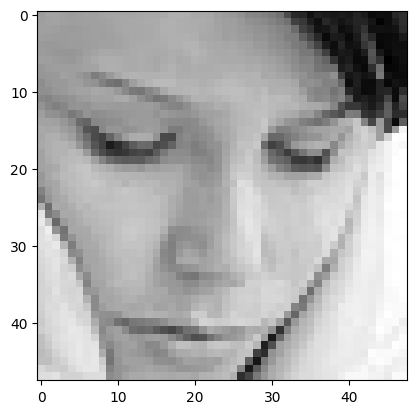

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
model prediction is  sad


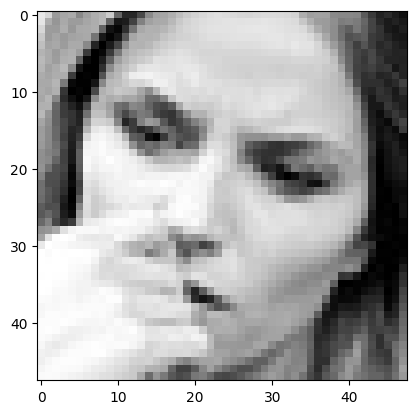

In [62]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 57ms/step
model prediction is  disgust


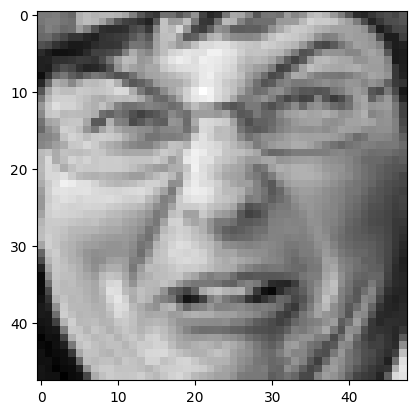

In [ ]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
model prediction is  happy


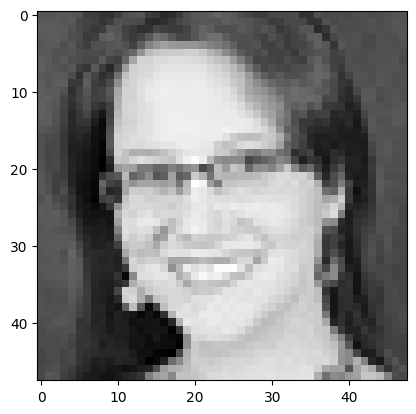

In [63]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 40ms/step
model prediction is  surprise


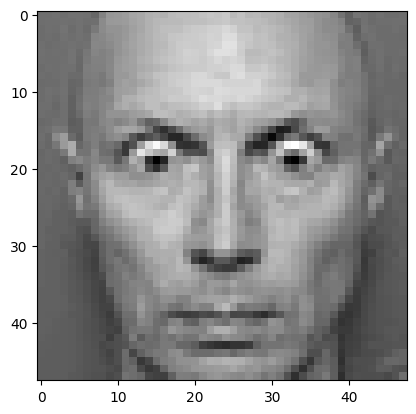

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')